In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    return pd.read_csv(file_path)

def dataset_overview(df):
    print("Dataset Information:")
    print(df.info())
    print("\nFirst 5 rows:")
    print(df.head())

def run_eda(file_path, numerical_cols, categorical_col):
    df = load_data(file_path)
    
    dataset_overview(df)
    return df 
    
file_path = 'C:/Users/nejat/AIM Projects/week6 data/data.csv'
numerical_cols = ['Amount', 'Value']  
categorical_col = 'ProductCategory'   

df = run_eda(file_path, numerical_cols, categorical_col)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15

In [7]:
def summary_statistics(df):
    print("Summary Statistics:")
    print(df.describe())

summary_statistics(df)

Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


Plotting distributions for: ['Amount', 'Value']


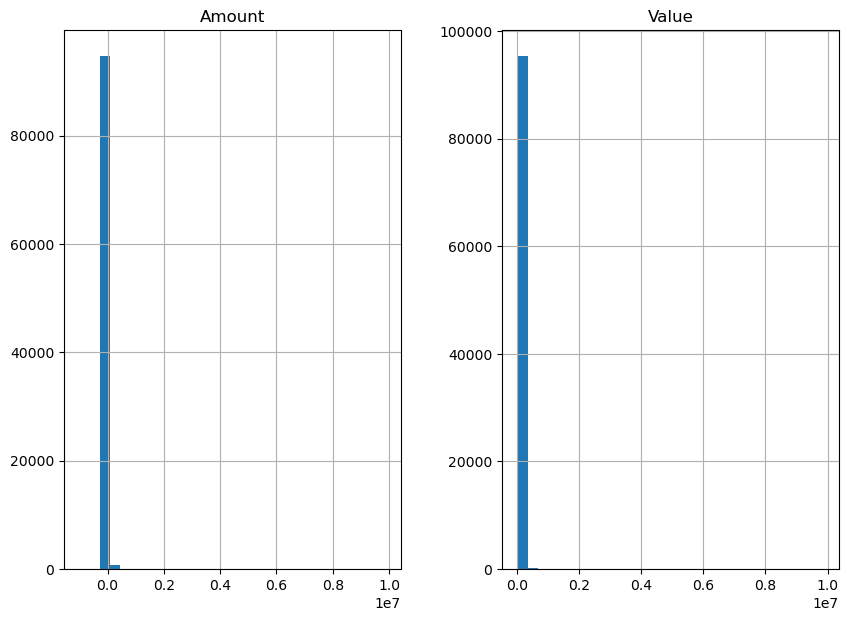

In [8]:
def plot_numerical_distributions(df, numerical_cols):
    print(f"Plotting distributions for: {numerical_cols}")
    df[numerical_cols].hist(bins=30, figsize=(10, 7))
    plt.show()

plot_numerical_distributions(df, numerical_cols)

Plotting distribution for: ProductCategory


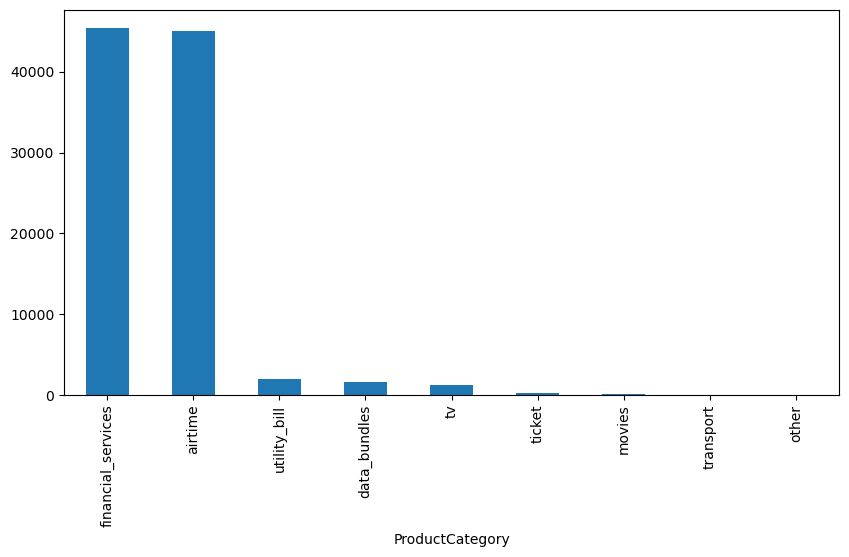

In [9]:
def plot_categorical_distributions(df, categorical_col):
    print(f"Plotting distribution for: {categorical_col}")
    df[categorical_col].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.show()

plot_categorical_distributions(df, categorical_col)

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


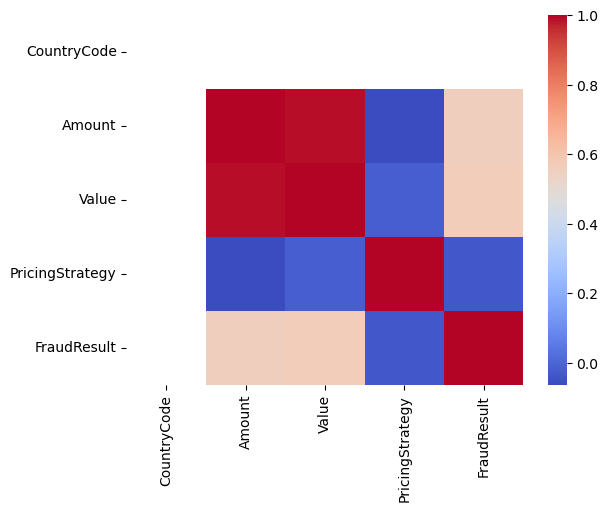

In [10]:
def plot_correlation_matrix(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.show()

plot_correlation_matrix(df)

In [11]:
def check_missing_values(df):
    missing = df.isnull().sum()
    print("Missing values:")
    print(missing)

check_missing_values(df)


Missing values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [12]:
def handle_missing_values(df, strategy='mean'):
    numerical_cols = df.select_dtypes(include='number')
    
    if strategy == 'mean':
        df[numerical_cols.columns] = numerical_cols.fillna(numerical_cols.mean())
    elif strategy == 'median':
        df[numerical_cols.columns] = numerical_cols.fillna(numerical_cols.median())
    
    print(f"Missing values handled using {strategy} strategy for numerical columns.")
    return df


Detecting outliers for: Amount


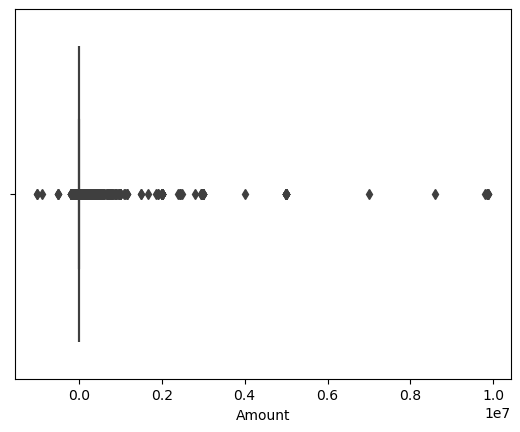

Detecting outliers for: Value


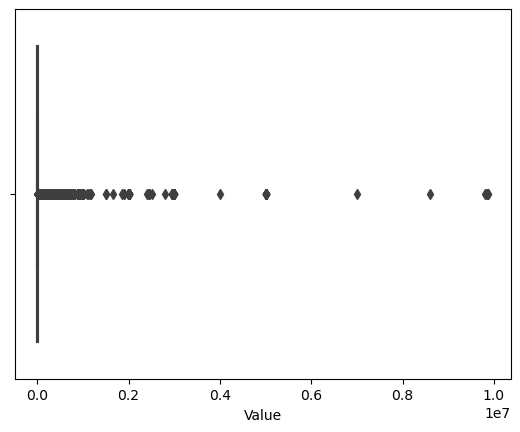

In [13]:
def detect_outliers(df, column):
    print(f"Detecting outliers for: {column}")
    sns.boxplot(x=df[column])
    plt.show()

for col in numerical_cols:
    detect_outliers(df, col)